In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Algorithms/JointUtility')
from utilityOnlyModel import UtilityDrivenReceiver, UtilityDrivenSignaler, UtilityDrivenSignaler_NoReceiverCosts

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment')
from visualizations_Experiment import visualizeExperimentTrial

## Setup Parameters

In [3]:
# Scenario setups
s = (4,0)
r = (4,7)

signalSpace_GC = ['green', 'circle']
signalSpace_PT = ['purple', 'triangle']

targetDict_GtGcPc = {(0,7): 'green triangle', (4,3):'green circle' , (8,7):'purple circle'}
targetDict_GcGtPc = {(0,7): 'green circle', (4,3):'green triangle' , (8,7):'purple circle'}
targetDict_GtPcGc = {(0,7): 'green triangle', (4,3):'purple circle' , (8,7):'green circle'}
targetDict_PcGtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (8,7):'green circle'}

targetDict_PcGtPtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (7,6): 'purple triangle', (8,7):'green circle'}

rationality = 4
reward = 8

gridDims = (9,10)

In [4]:
getReceiverSetup1 = UtilityDrivenReceiver(signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GtGcPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality)

getReceiverSetup2 = UtilityDrivenReceiver(signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GtGcPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality)

getReceiverSetup3 = UtilityDrivenReceiver(signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GcGtPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality)

getReceiverSetup4 = UtilityDrivenReceiver(signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_PcGtPtGc, 
                                          valueOfReward=reward, 
                                          rationality=rationality)

In [5]:
getSignalerSetup1 = UtilityDrivenSignaler(signalSpace=signalSpace_PT, 
                                          signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GtGcPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality) 

getSignalerSetup2 = UtilityDrivenSignaler(signalSpace=signalSpace_GC, 
                                          signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GtGcPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality) 

getSignalerSetup3 = UtilityDrivenSignaler(signalSpace=signalSpace_GC, 
                                          signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_GcGtPc, 
                                          valueOfReward=reward, 
                                          rationality=rationality) 

getSignalerSetup4 = UtilityDrivenSignaler(signalSpace=signalSpace_PT, 
                                          signalerLocation=s, 
                                          receiverLocation=r, 
                                          targetDictionary=targetDict_PcGtPtGc, 
                                          valueOfReward=reward, 
                                          rationality=rationality) 

# Condition 0: Sanity Signaler
- goal: green circle
(a case where the signaler should just do it themself)

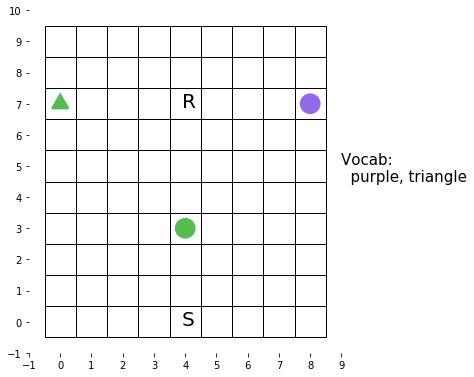

In [6]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_GtGcPc, True)

In [7]:
getSignalerSetup1({'intentions':'green circle'})

,probability
signals,
green circle,1.0


# Condition 1 : Baseline
    - Target:Green Triangle

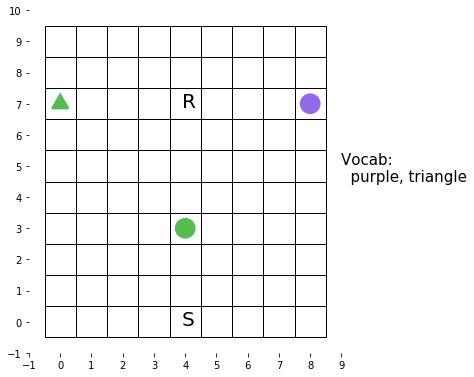

In [8]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_GtGcPc, True)

In [9]:
getReceiverSetup1('triangle').round(4)

p(mind)
desires worlds actions          intentions             
1       1      ((0, 7), (4, 7)) green triangle      0.0
               ((4, 0), (0, 7)) green triangle      1.0
               ((4, 0), (4, 3)) green triangle      0.0
               ((4, 0), (8, 7)) green triangle      0.0
               ((4, 3), (4, 7)) green triangle      0.0
               ((8, 7), (4, 7)) green triangle      0.0

In [10]:
getSignalerSetup1({'intentions':'green triangle'})

,probability
signals,
green triangle,6.914400e-13
triangle,1.000000e+00


# Condition 2: Utility Not Enough
- Target: Purple Circle

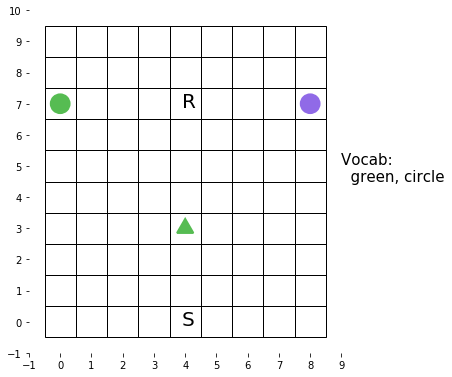

In [11]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [12]:
rec3 = getReceiverSetup3('circle').round(4)
rec3

p(mind)
desires worlds actions          intentions            
1       1      ((0, 7), (4, 7)) green circle       0.0
                                purple circle      0.0
               ((4, 0), (0, 7)) green circle       0.5
                                purple circle      0.0
               ((4, 0), (4, 3)) green circle       0.0
                                purple circle      0.0
               ((4, 0), (8, 7)) green circle       0.0
                                purple circle      0.5
               ((4, 3), (4, 7)) green circle       0.0
                                purple circle      0.0
               ((8, 7), (4, 7)) green circle       0.0
                                purple circle      0.0

In [13]:
getSignalerSetup3({'intentions':'purple circle'})

,probability
signals,
circle,1.000000e+00
purple circle,6.914400e-13


# Condition 3: Pragmatics Not Enough
- Target: Green Circle

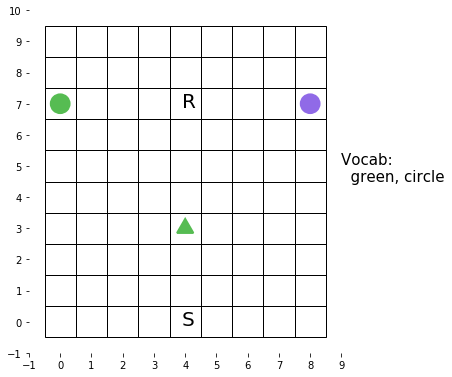

In [14]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [15]:
getReceiverSetup3('green').round(4)

p(mind)
desires worlds actions          intentions             
1       1      ((0, 7), (4, 7)) green circle     0.0000
                                green triangle   0.0000
               ((4, 0), (0, 7)) green circle     0.9823
                                green triangle   0.0000
               ((4, 0), (4, 3)) green circle     0.0000
                                green triangle   0.0177
               ((4, 0), (8, 7)) green circle     0.0000
                                green triangle   0.0000
               ((4, 3), (4, 7)) green circle     0.0000
                                green triangle   0.0000
               ((8, 7), (4, 7)) green circle     0.0000
                                green triangle   0.0000

In [16]:
sig3 = getSignalerSetup3({'intentions':'green circle'})
sig3

,probability
signals,
green circle,6.914400e-13
circle,5.000000e-01
green,5.000000e-01


# Condition 4: Neither Alone is Enough
- Target: Purple Circle

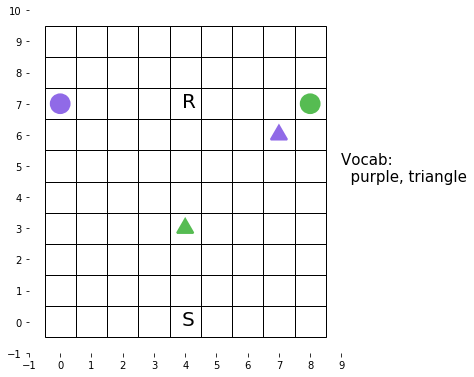

In [17]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_PcGtPtGc) 

In [18]:
getReceiverSetup4('purple').round(4)

p(mind)
desires worlds actions          intentions              
1       1      ((0, 7), (4, 7)) purple circle        0.0
                                purple triangle      0.0
               ((4, 0), (0, 7)) purple circle        0.5
                                purple triangle      0.0
               ((4, 0), (4, 3)) purple circle        0.0
                                purple triangle      0.0
               ((4, 0), (7, 6)) purple circle        0.0
                                purple triangle      0.5
               ((4, 0), (8, 7)) purple circle        0.0
                                purple triangle      0.0
               ((4, 3), (4, 7)) purple circle        0.0
                                purple triangle      0.0
               ((7, 6), (4, 7)) purple circle        0.0
                                purple triangle      0.0
               ((8, 7), (4, 7)) purple circle        0.0
                                purple triangle      0.0

In [19]:
getSignalerSetup4({'intentions':'purple circle'})

,probability
signals,
purple,1.000000e+00
purple circle,6.914400e-13
